# Laptop Users

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-of-laptop-users/Laptop-Users.csv


In [2]:
# importing Liberaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# loading data
df = pd.read_csv('/kaggle/input/dataset-of-laptop-users/Laptop-Users.csv')
df

,Age,Gender,Region,Occupation,Income,Has Laptop
0,14,male,city,student,0,no
1,34,female,city,teacher,22000,no
2,42,male,countryside,banker,24000,yes
3,30,male,countryside,teacher,25000,no
4,16,male,city,student,0,no
5,33,female,city,banker,20000,yes
6,26,female,city,student,8000,yes
7,22,male,city,student,4000,yes
8,28,female,countryside,teacher,12000,no
9,27,female,city,student,7000,yes


In [4]:
# Getting the shape of data
df.shape

(20, 6)

In [5]:
# GEtting data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         20 non-null     int64 
 1   Gender      20 non-null     object
 2   Region      20 non-null     object
 3   Occupation  20 non-null     object
 4   Income      20 non-null     int64 
 5   Has Laptop  20 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.1+ KB


In [6]:
# checking nulll values
df.isnull().sum()

Age           0
Gender        0
Region        0
Occupation    0
Income        0
Has Laptop    0
dtype: int64

In [7]:
# Summarizing the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20.0,30.2,10.904369,14.0,25.0,28.5,35.25,54.0
Income,20.0,14650.0,9745.579295,0.0,7750.0,13000.0,24250.00,30000.0


# Visualization

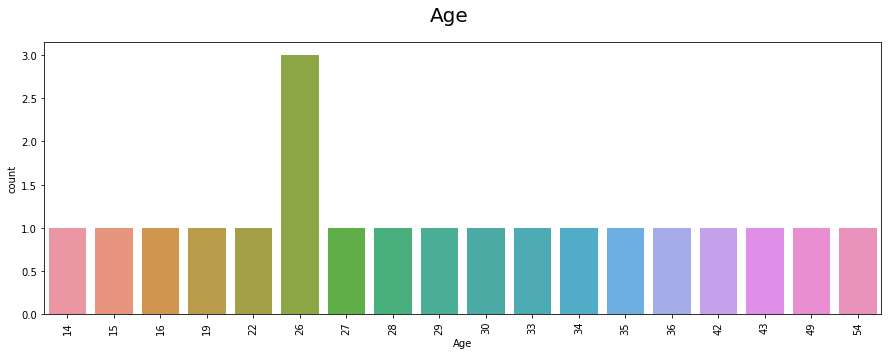

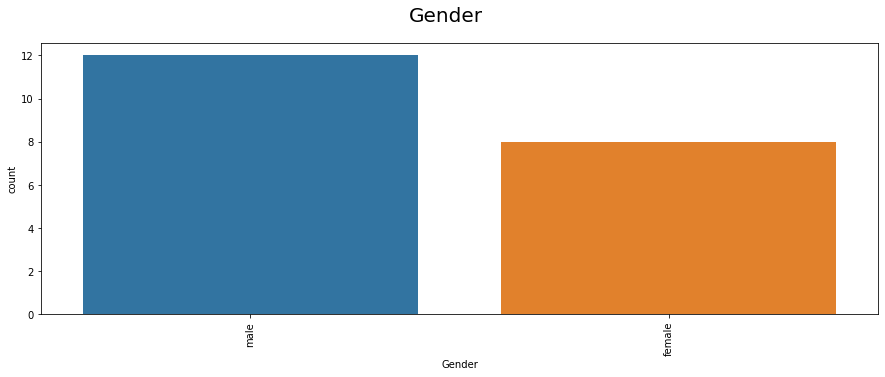

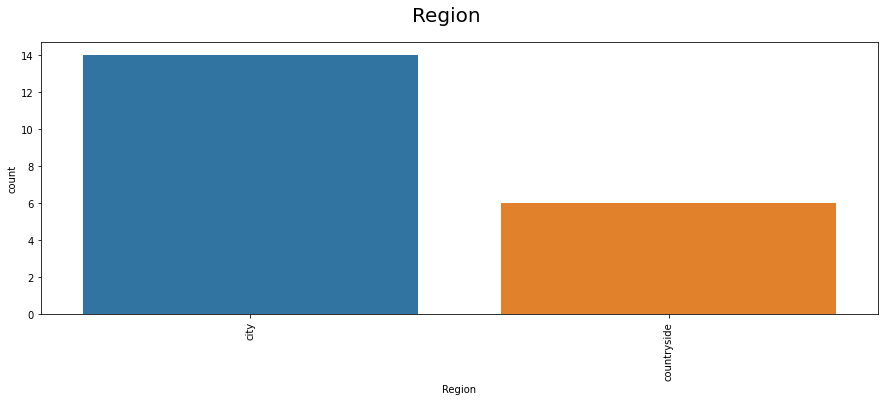

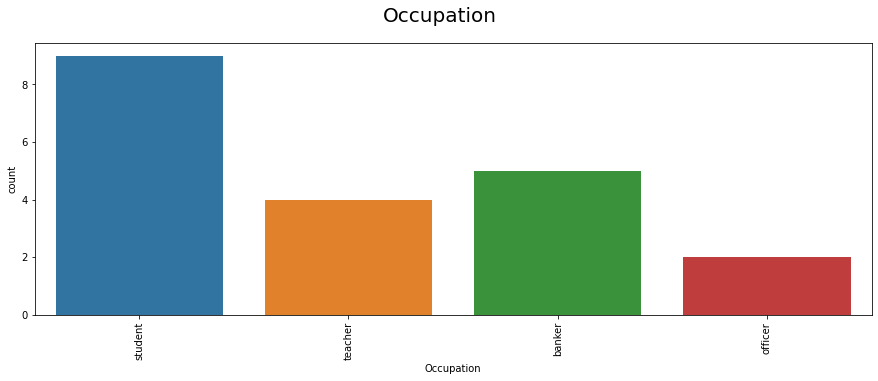

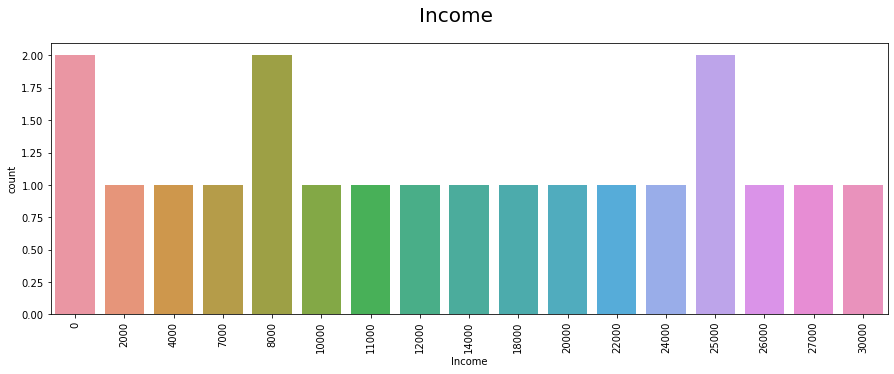

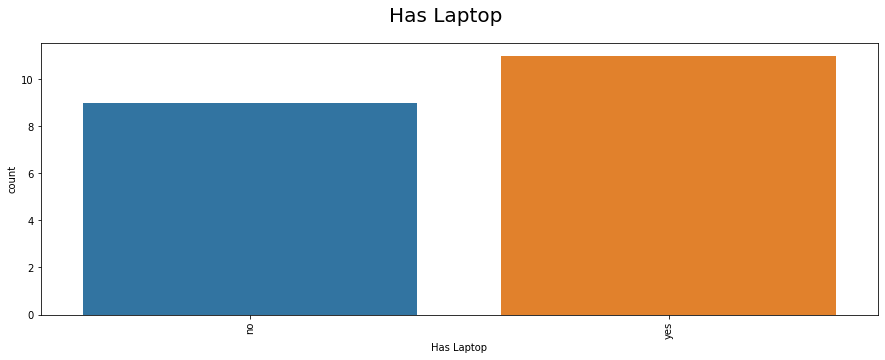

In [8]:
def hist_count(column, data):
    if column in data:
        f, axes = plt.subplots(1,1,figsize=(15,5))
        sns.countplot(x=column, data=data)
        plt.xticks(rotation = 90)
        plt.suptitle(column, fontsize=20)
        plt.show()
    plt.show()
for column in df.columns:
    hist_count(column,df)

In [9]:
# Age and Laptop
import plotly.express as px
fig = px.histogram(df, x = df['Age'], color = 'Has Laptop')
fig.show()
fig2 = px.box(df, x = df['Age'], color = 'Has Laptop')
fig2.show()

In [10]:
# Gender and Laptop
import plotly.express as px
fig = px.histogram(df, x = df['Gender'], color = 'Has Laptop')
fig.show()
fig2 = px.box(df, x = df['Gender'], color = 'Has Laptop')
fig2.show()

In [11]:
# Occupation and Laptop
import plotly.express as px
fig = px.histogram(df, x = df['Occupation'], color = 'Has Laptop')
fig.show()
fig2 = px.box(df, x = df['Occupation'], color = 'Has Laptop')
fig2.show()

In [12]:
# Income and Laptop
import plotly.express as px
fig = px.histogram(df, x = df['Income'], color = 'Has Laptop')
fig.show()
fig2 = px.box(df, x = df['Income'], color = 'Has Laptop')
fig2.show()

<AxesSubplot:>

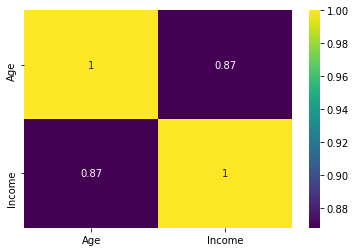

In [13]:
# Correlation graph
sns.heatmap(df.corr(),annot = True, cmap = 'viridis')

In [14]:
import pandas_profiling as pp
profile = pp.ProfileReport(df, title = "Laptop User Data")
profile

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Creating Data Models

In [15]:
df.columns

Index(['Age', 'Gender', 'Region', 'Occupation', 'Income', 'Has Laptop'], dtype='object')

In [16]:
# getting features 
features = ['Age', 'Gender', 'Region', 'Occupation', 'Income']
x = pd.get_dummies(df[features])

# Getting predicting value
y = df['Has Laptop']

In [17]:
# Seperating data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 1/6, random_state = 42)

In [18]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [19]:
# Defining Models
def Classification_models(x,y,xt,yt):
    # Importing All LIberaries
    from sklearn.metrics import accuracy_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import svm
    from sklearn.neighbors import KNeighborsClassifier

    # Initializing models
    logisreg = LogisticRegression()
    lda = LinearDiscriminantAnalysis()
    gnb = GaussianNB()
    dtc = DecisionTreeClassifier()
    rfc = RandomForestClassifier()
    svmodel = svm.SVC()
    knnmodel = KNeighborsClassifier()
    
    # Fitting Models
    logisreg.fit(x,y)
    lda.fit(x,y)
    gnb.fit(x,y)
    dtc.fit(x,y)
    rfc.fit(x,y)
    svmodel.fit(x,y)
    knnmodel.fit(x,y)
    
    # Getting PRedicting Values
    logi_pred = logisreg.predict(xt)
    lda_pred = lda.predict(xt)
    gnb_pred = gnb.predict(xt)
    dtc_pred = dtc.predict(xt)
    rfc_pred = rfc.predict(xt)
    svm_pred = svmodel.predict(xt)
    knn_pred = knnmodel.predict(xt)
    
    # Getting Accuracy Score
    acc_logisreg = accuracy_score(yt, logi_pred)
    acc_lda = accuracy_score(yt, lda_pred)
    acc_ganb = accuracy_score(yt, gnb_pred)
    acc_dtree = accuracy_score(yt, dtc_pred)
    acc_rf = accuracy_score(yt, rfc_pred)
    acc_svc = accuracy_score(yt, svm_pred)
    acc_knn = accuracy_score(yt, knn_pred)
    
    # MOdel Selection
    models = pd.DataFrame({
    'Model': ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf, acc_svc, acc_knn]})

    print(models.sort_values(by='Score', ascending=False))
    sns.barplot(x = models['Score'], y = models['Model'], palette='viridis');

                          Model  Score
3                 Decision Tree   1.00
4                 Random Forest   0.75
0           Logistic Regression   0.50
1  Linear Discriminant Analysis   0.50
2                   Naive Bayes   0.50
5       Support Vector Machines   0.50
6         K - Nearest Neighbors   0.25


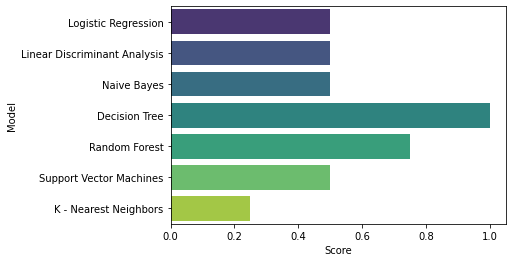

In [20]:
Classification_models(x_train,y_train,x_test,y_test)

# Sumamry
* Decision Tree Classification Model is the best here with an accyracy of 100%
* Random Forest was just behind it with an accyracy of 75%

***Please leave your valuable feedback in the comment Section Below and dont forget to UPVOTE.....***